In [61]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from matplotlib.colors import LogNorm
import seaborn as sns
from scipy.optimize import curve_fit
from scipy import stats
import scipy
from scipy.special import erf

Importing the Raw data for Cesium-137

In [62]:
data = pd.read_csv("DataR_CH3@V1730_221_run101_2.csv")
df1=data["BOARD;CHANNEL;TIMETAG;ENERGY;ENERGYSHORT;FLAGS"].str.split(";", expand=True)
df1=df1.rename(columns={
    0 : "Board",
    1 : "Channel",
    2 : "TimeTag",
    3 : "Energy",
    4 : "EnergyShort",
    5 : "Flags"
})
df1.to_csv("refined_data_102.csv")
df1

,Board,Channel,TimeTag,Energy,EnergyShort,Flags
0,0,3,2200849655,744,687,0x4000
1,0,3,7554811467,489,434,0x4000
2,0,3,8998446054,454,422,0x4000
3,0,3,14671903624,107,94,0x4000
4,0,3,20159080905,138,135,0x4000
...,...,...,...,...,...,...
91781,0,3,318121621114646,540,503,0x4000
91782,0,3,318131973427982,275,264,0x4000
91783,0,3,318137132314671,304,285,0x4000
91784,0,3,318147292373139,238,226,0x4000


In [63]:
df2 = pd.read_csv("refined_data_102.csv")

cloumn = "Energy"
select_column = df2[cloumn]
select_column_energy = select_column.tolist()
type(select_column_energy)




colum2 = "EnergyShort"
select_column2 = df2[colum2]
select_column_short = select_column2.tolist()

cloum3 = "TimeTag"
select_column3 = df2[cloum3]
select_column_timetag = select_column3.tolist()

In [64]:
long_gate = np.array(select_column_energy)
short_gate = np.array(select_column_short)
time_tag_array = np.array(select_column_timetag)

In [65]:
QsbyQl = np.divide(short_gate , long_gate)
psd = 1-QsbyQl
psd_list = psd.tolist()

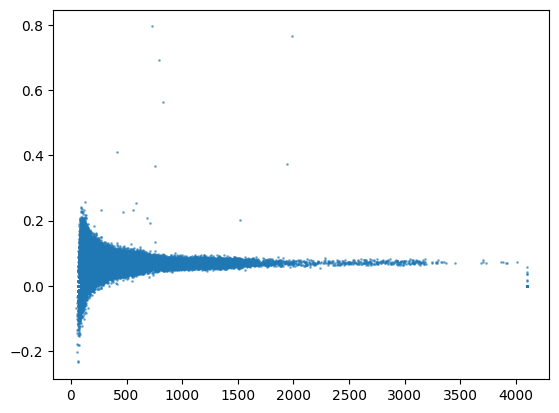

In [66]:
plt.scatter( long_gate , psd , alpha=0.5, s=1)

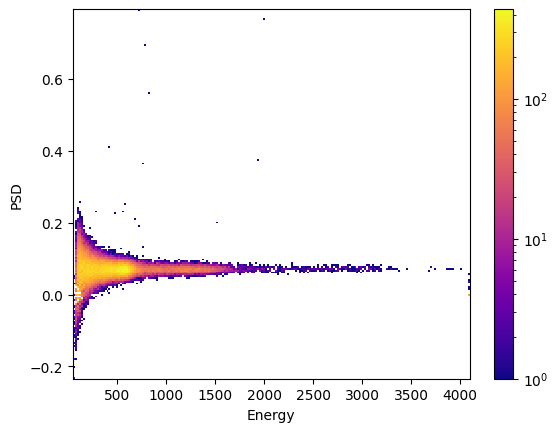

In [67]:
h, xedge, yedge, img = plt.hist2d(long_gate, psd, bins=(200,200), cmap='plasma', norm=LogNorm())
# plt.xlabel("ADC Channel")
plt.colorbar()
plt.xlabel("Energy")
plt.ylabel("PSD")
plt.savefig("Heat_plot.png")

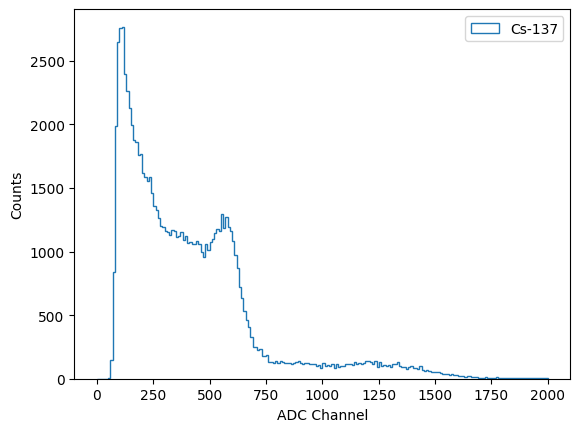

In [68]:
counts , edges , plot = plt.hist( long_gate ,  bins = 200, histtype='step' , range=(0,2000), density=False , label = "Cs-137" )
plt.xlabel("ADC Channel")
plt.ylabel("Counts")
plt.legend()
plt.savefig("ADC spectrum of Cs-137.png")

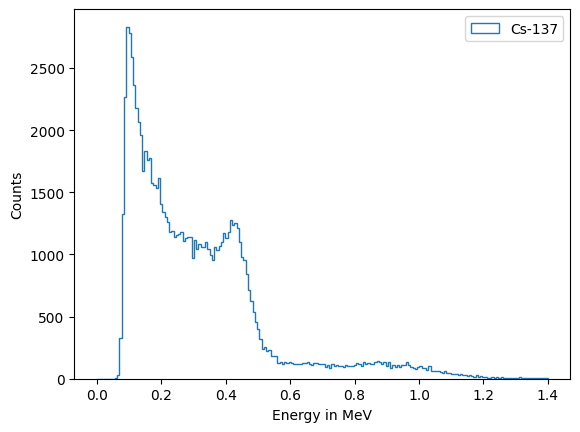

In [69]:
long_gate2 = (0.0007032008642733409)*(long_gate) + (0.02537153831758976)
counts , edges , plot = plt.hist( long_gate2 ,  bins = 200, histtype='step' , range=(0 , 1.4), density=False , label = "Cs-137" )
plt.xlabel("Energy in MeV")
plt.ylabel("Counts")
plt.legend()
plt.savefig("Energy spectrum of Cs-137.png")

In [70]:
statistic, bin_edges, bin_number = stats.binned_statistic(long_gate , long_gate , range=(100,2000) ,statistic='std', bins= 200)

In [71]:
# print(bin_edges)

In [72]:
for i in range( 0 , len(bin_edges)):
    if bin_edges[i] == 651.:
        print(i)

58


In [73]:
print(statistic[58])

2.80351526651775


In [74]:
# statistic

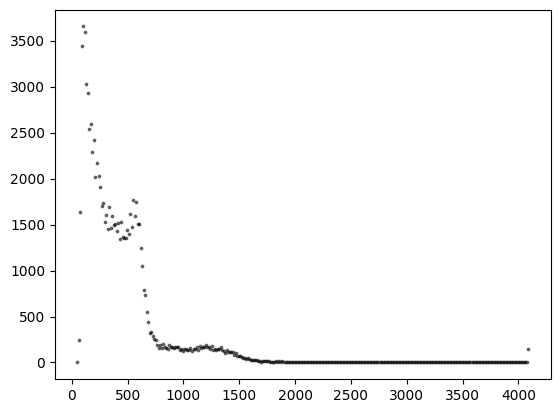

In [75]:
counts , edges , plot = plt.hist( long_gate , bins = 300 )
plt.clf()
plt.scatter((edges[1:] + edges[:-1])/2, counts , color = 'black' , alpha=0.5, s=3)


In [76]:
l = np.array([1,2,3,4,6,7,84,3,5])
print((l[:-1] + l[1:]) / 2)

[ 1.5  2.5  3.5  5.   6.5 45.5 43.5  4. ]


In [77]:
def erf_model(x, a, c, d,sigma):
    return 1- (a * erf((x + c)/(np.sqrt(2)*sigma)) + d)

In [78]:
def erf_model2(x, a, c, d,sigma):
    return (a * (1-erf((x + c)/(np.sqrt(2)*sigma))) + d)

In [79]:
x_data = ((edges[1:] + edges[:-1])/2).tolist()
y_data = (counts).tolist()
x_data_r = []
y_data_r = []
for i in range(0 , len(x_data)):
    if (x_data[i] >= 510) and ( x_data[i] <= 1200 ) :
        x_data_r.append(x_data[i])
        y_data_r.append(y_data[i])
x_data_r = np.array(x_data_r)
y_data_r = np.array(y_data_r)

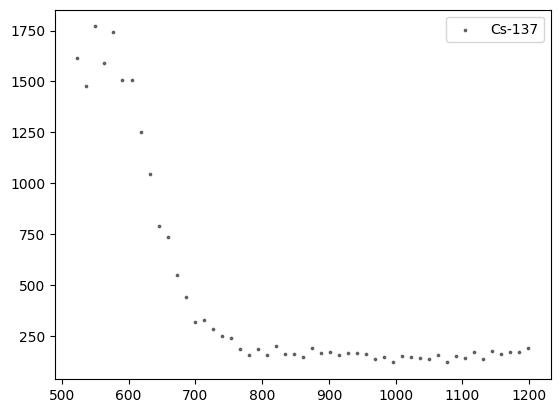

In [80]:
plt.scatter(x_data_r, y_data_r , color = 'black' , alpha=0.5, s=3 , label = "Cs-137")
plt.legend()
plt.savefig("counts_vs_ADC.png")

In [81]:
x_data_r

array([ 523.36833333,  536.87166667,  550.375     ,  563.87833333,
        577.38166667,  590.885     ,  604.38833333,  617.89166667,
        631.395     ,  644.89833333,  658.40166667,  671.905     ,
        685.40833333,  698.91166667,  712.415     ,  725.91833333,
        739.42166667,  752.925     ,  766.42833333,  779.93166667,
        793.435     ,  806.93833333,  820.44166667,  833.945     ,
        847.44833333,  860.95166667,  874.455     ,  887.95833333,
        901.46166667,  914.965     ,  928.46833333,  941.97166667,
        955.475     ,  968.97833333,  982.48166667,  995.985     ,
       1009.48833333, 1022.99166667, 1036.495     , 1049.99833333,
       1063.50166667, 1077.005     , 1090.50833333, 1104.01166667,
       1117.515     , 1131.01833333, 1144.52166667, 1158.025     ,
       1171.52833333, 1185.03166667, 1198.535     ])

In [82]:
y_data_r

array([1615., 1477., 1770., 1591., 1742., 1509., 1509., 1250., 1048.,
        790.,  736.,  550.,  441.,  318.,  329.,  283.,  251.,  241.,
        187.,  159.,  188.,  157.,  202.,  164.,  161.,  149.,  190.,
        165.,  173.,  156.,  167.,  166.,  164.,  135.,  145.,  120.,
        151.,  147.,  141.,  137.,  159.,  121.,  151.,  142.,  172.,
        137.,  176.,  161.,  172.,  170.,  190.])

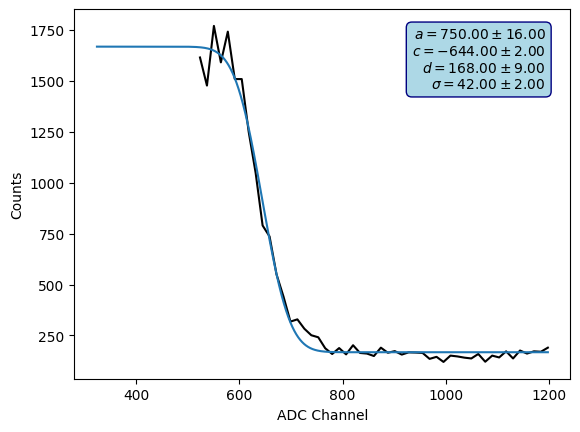

In [124]:
# p = [700, -800, -500, 100]
m , dm = scipy.optimize.curve_fit(erf_model , x_data_r , y_data_r ,  bounds = (  [100, -1200, -924, 1], [825, -500, -899, 1000]  ))
plt.plot( x_data_r , y_data_r , color = 'black' )
 # [625 , -1200 , -975 , 1] , [775 , -500 , -875 , 500]
x_fit = np.linspace(min(x_data_r) - 200, max(x_data_r), 10000 )
plt.plot( x_fit , erf_model(x_fit, *m))
param_text = (
    fr'$a = {750:.2f} \pm {16:.2f}$' + '\n' +
    fr'$c = {-644:.2f} \pm {2:.2f}$' + '\n' +
    fr'$d = {168:.2f} \pm {9:.2f}$' + '\n' +
    fr'$\sigma = {42 :.2f} \pm {2:.2f}$'
)

plt.text(0.95, 0.95, param_text, transform=plt.gca().transAxes,
         fontsize=10, verticalalignment='top', horizontalalignment='right',
         bbox=dict(boxstyle='round,pad=0.4', facecolor='lightblue', edgecolor='navy'))
plt.xlabel("ADC Channel")
plt.ylabel("Counts")
# plt.legend()
plt.savefig("Fitted curve for Cesium-137.png")

In [84]:
# m

array([ 750.33165455, -644.17417362, -916.93174182,   42.19779635])

In [125]:
# p = [700, -800, -500, 100]
# m1 , dm1 = scipy.optimize.curve_fit(erf_model2 , x_data_r , y_data_r ,  p0 = [750, -675, 200, 50] , bounds = ([600 , -800 , 0, 0] , [800 , -500 , 250 , 100]))
# plt.plot( x_data_r , y_data_r , color = 'black' )
#  # [625 , -1200 , -975 , 1] , [775 , -500 , -875 , 500]
# x_fit = np.linspace(min(x_data_r) - 200, max(x_data_r), 10000 )
# plt.plot( x_fit , erf_model(x_fit, *m1))
# plt.xlabel("ADC Channel")
# plt.ylabel("Counts")
# plt.legend()
# plt.savefig("Fitted curve for Cesium-137.png")

In [111]:
m1

array([ 750.33198144, -644.17420111,  167.59990504,   42.19795258])

In [114]:
dm1

array([[263.61950831,  21.02172433, -52.16957189,  29.27929472],
       [ 21.02172433,   5.08631434,   3.26161103,   2.32907582],
       [-52.16957189,   3.26161103,  84.86800602,  -5.85328688],
       [ 29.27929472,   2.32907582,  -5.85328688,   8.59497374]])

In [115]:
np.sqrt(np.diag(dm1))

array([16.23636376,  2.25528587,  9.2123833 ,  2.93171856])

In [89]:
# # p = [700, -800, -500, 100]
# m , dm = scipy.optimize.curve_fit(erf_model2 , x_data_r , y_data_r ,  p0 = [   ))
# plt.plot( x_data_r , y_data_r , color = 'black' )
#  # [625 , -1200 , -975 , 1] , [775 , -500 , -875 , 500]
# x_fit = np.linspace(min(x_data_r) - 200, max(x_data_r), 10000)
# plt.plot( x_fit , erf_model2(x_fit, *m) )
# plt.savefig("Fitted curve for Cesium-137.png")

In [90]:
m

array([ 750.33165455, -644.17417362, -916.93174182,   42.19779635])

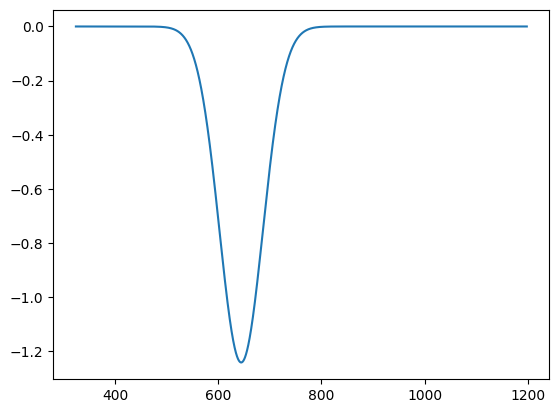

In [91]:
y_prime = np.gradient(erf_model( x_fit ,750.33165455, -644.17417362, -916.93174182,   42.19779635 ))
plt.plot( x_fit , y_prime)

In [92]:
print(min(y_prime))

-1.2417591506194299


In [93]:
for i in range( 0 , len(y_prime)):
    if y_prime[i] ==  min(y_prime):
        print( x_fit[i] )

644.1489947328066


In [94]:
# so the edge of Cs is 512.1606625662566 ADC

In [95]:
for i in range(0, len(x_data_r)):
    if y_data_r[i] == 1770:
        print(x_data_r[i])

550.375


In [96]:
# So the peak is at 550.375 ADC  E = 661.66KeV

In [97]:
energy_array = np.add((np.multiply(  x_data_r , 0.0008915654300646849)) , 0.16393663452406193)

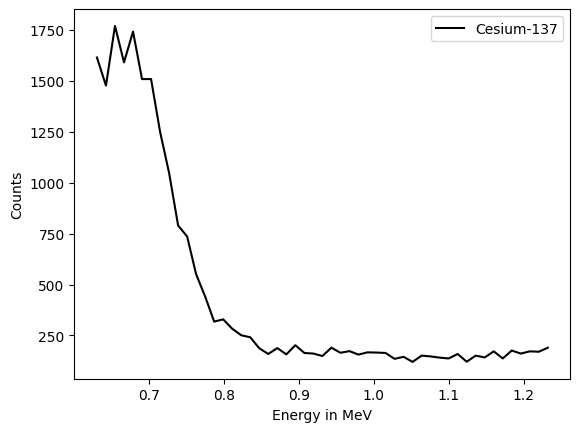

In [98]:
plt.plot(  energy_array , y_data_r, color = "Black" , label = 'Cesium-137')
plt.xlabel("Energy in MeV")
plt.ylabel("Counts")
plt.legend()
plt.savefig("Energy Spectrum of Cesium-137.png")

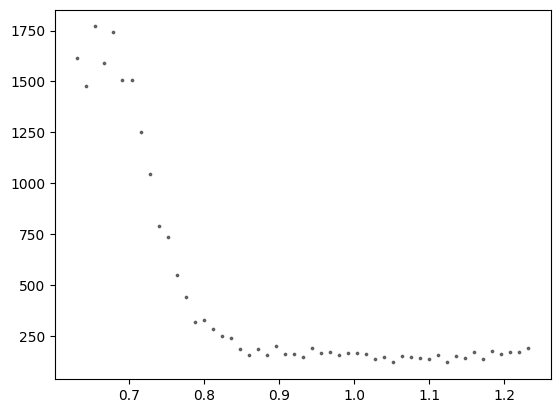

In [99]:
plt.scatter(  energy_array , y_data_r, color = "Black" , label = 'Cesium-137' , alpha = 0.5 , s =3 )

In [100]:
print(max(y_data_r))

1770.0


In [101]:
for i in range(0 , len( y_data_r )):
    if y_data_r[i] == 1770:
        print(energy_array[i])

0.6546319580959129


In [102]:
x_data_r2 = []
y_data_r2 = []
for i in range(0 , len(x_data)):
    if (x_data[i] >= 500) and ( x_data[i] <= 2000 ) :
        x_data_r2.append(x_data[i])
        y_data_r2.append(y_data[i])
x_data_r2 = np.array(x_data_r)
y_data_r2 = np.array(y_data_r)

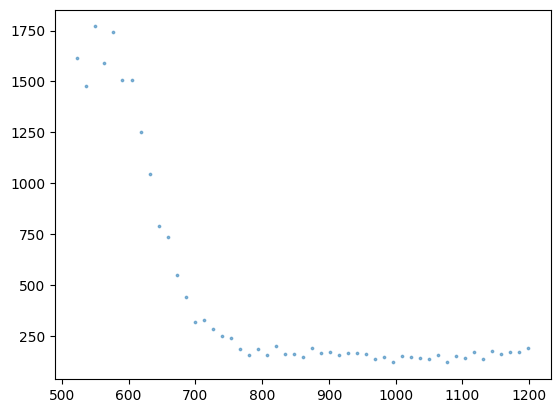

In [103]:
plt.scatter(x_data_r2 , y_data_r2 , alpha = 0.5 , s =3 )